In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"C:\Users\mahar\PREDICTIVE MAINTENANCE FOR AIRLINES\Dataset\air_passengers.csv")

In [3]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data=data.rename(columns={'#Passengers':'Passengers'})

In [5]:
data.head(2)

,Month,Passengers
0,1949-01,112
1,1949-02,118


In [6]:
data['year']=pd.DatetimeIndex(data['Month']).year

In [7]:
data.head(2)

,Month,Passengers,year
0,1949-01,112,1949
1,1949-02,118,1949


In [8]:
data['month']=pd.DatetimeIndex(data['Month']).month

In [9]:
data.head(2)

,Month,Passengers,year,month
0,1949-01,112,1949,1
1,1949-02,118,1949,2


In [10]:
data.drop(['Month'],axis=1,inplace=True)

In [11]:
data.head(2)

,Passengers,year,month
0,112,1949,1
1,118,1949,2


Text(0, 0.5, 'No. of Passengers')

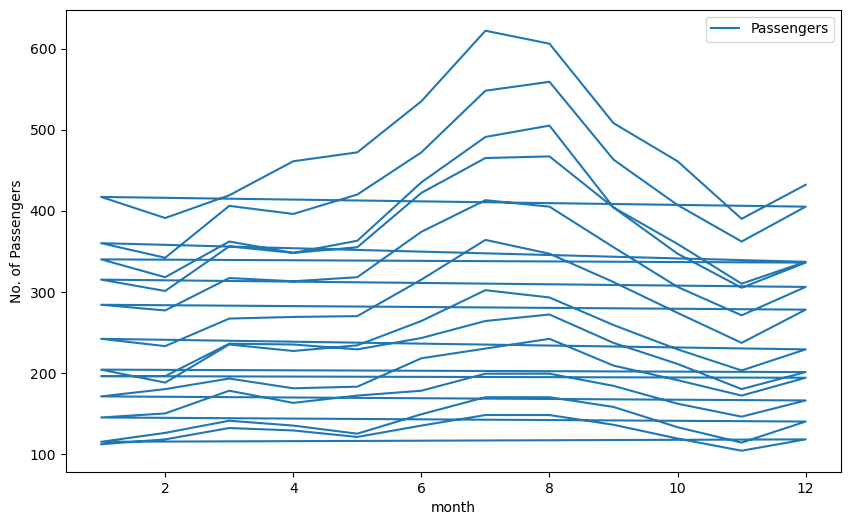

In [12]:
#data visualization
#plot between month and passengers
data.plot(x='month',y='Passengers',figsize=(10,6))
plt.xlabel('month')
plt.ylabel('No. of Passengers')

Text(0, 0.5, 'No. of Passengers')

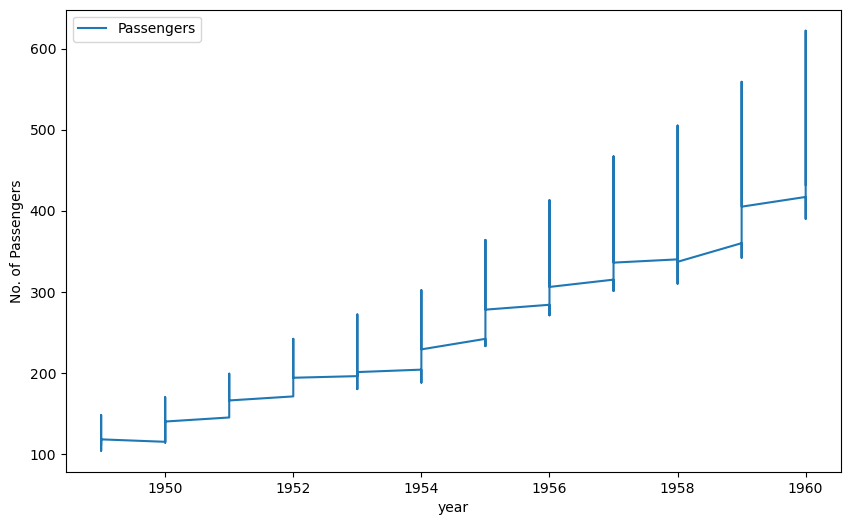

In [13]:
data.plot(x='year',y='Passengers',figsize=(10,6))
plt.xlabel('year')
plt.ylabel('No. of Passengers')

Text(0, 0.5, 'No. of Passengers')

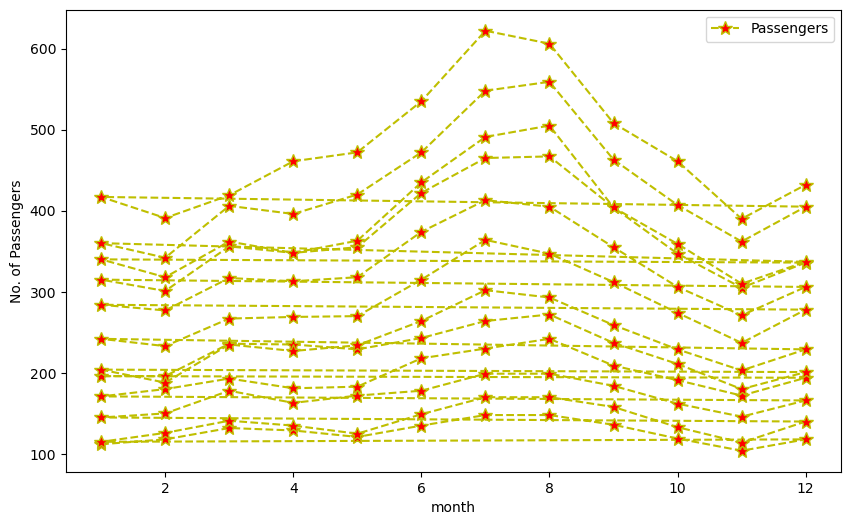

In [14]:
data.plot(x='month',y='Passengers',figsize=(10,6),linestyle='--', marker='*', 
          markerfacecolor='r',color='y',markersize=10)
plt.xlabel('month')
plt.ylabel('No. of Passengers')

Text(0, 0.5, 'No. of Passengers')

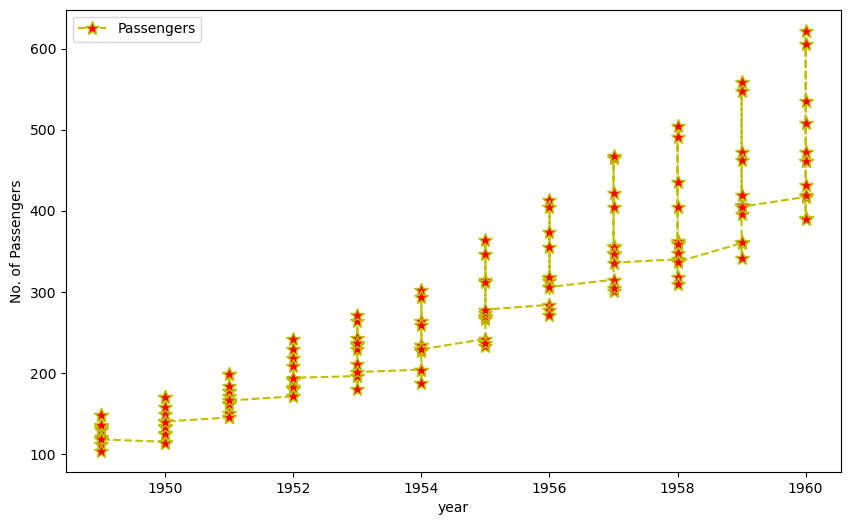

In [15]:
data.plot(x='year',y='Passengers',figsize=(10,6),linestyle='--', marker='*', markerfacecolor='r',color='y',markersize=10)
plt.xlabel('year')
plt.ylabel('No. of Passengers')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

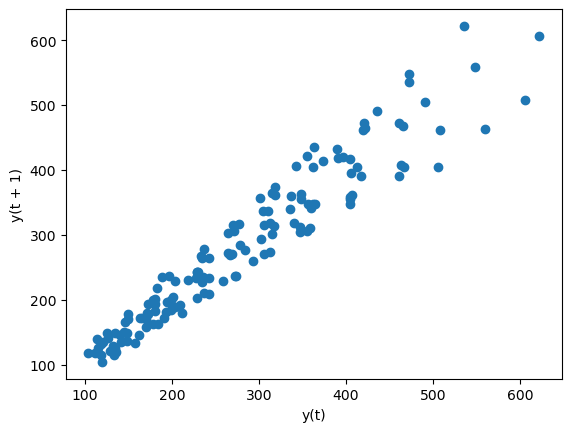

In [16]:
#lag plot
pd.plotting.lag_plot(data['Passengers'])

<AxesSubplot:xlabel='year', ylabel='Passengers'>

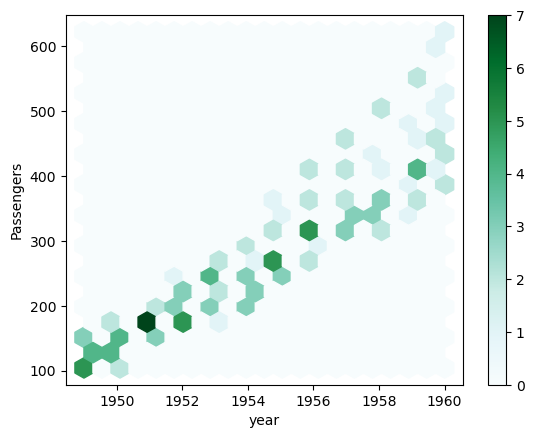

In [17]:
#hexbin plot
data.plot.hexbin(x='year',y='Passengers',gridsize=20)

<AxesSubplot:xlabel='month', ylabel='Passengers'>

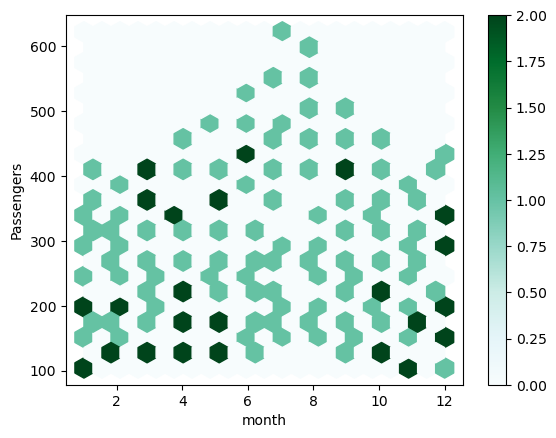

In [18]:
data.plot.hexbin(x='month',y='Passengers',gridsize=20)

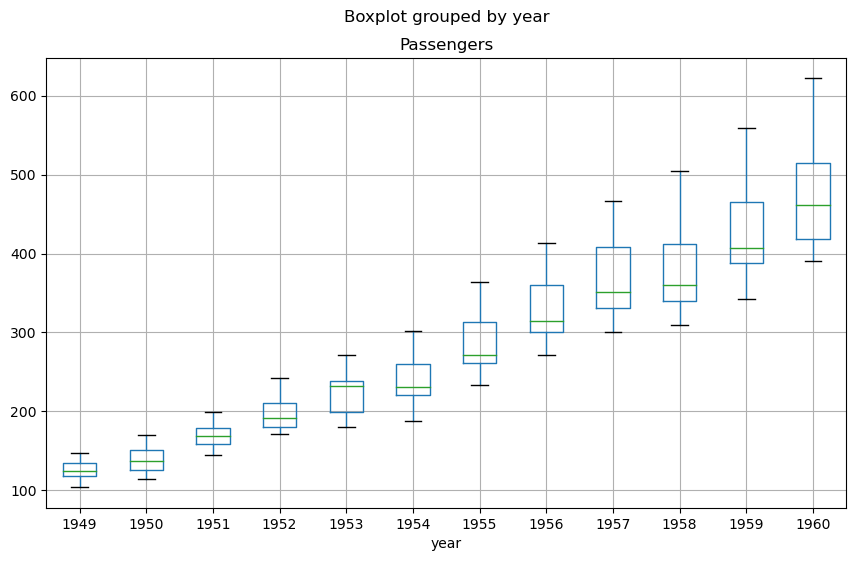

In [19]:
#box plot
a=data.boxplot(figsize=(10,6),by='year',column='Passengers')

<AxesSubplot:xlabel='year', ylabel='Passengers'>

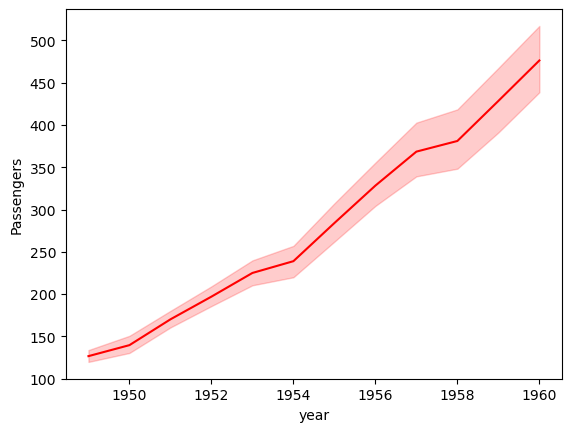

In [20]:
#lineplot between year and passengers
#import seaborn library
import seaborn as sns
sns.lineplot(x='year',y='Passengers',data=data,color='red')

<AxesSubplot:xlabel='month', ylabel='Passengers'>

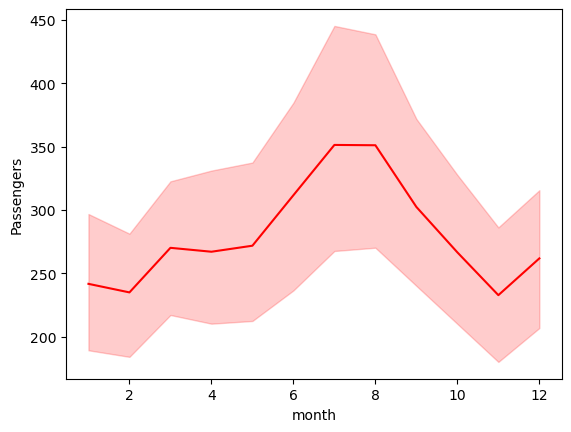

In [21]:
#lineplot between month and passengers
import seaborn as sns
sns.lineplot(x='month',y='Passengers',data=data,color='red')

In [22]:
#assiging data to train_df
train_df = pd.DataFrame(data)

In [23]:
# split into train and test sets
#considering 90% data as train set and 10% as test set 
train_len =  int(0.9*len(train_df))
test_len = len(train_df) - train_len

train,test = train_df.iloc[:train_len],train_df.iloc[train_len:len(train_df)]
print(train_df.shape,train.shape,test.shape)

(144, 3) (129, 3) (15, 3)


In [24]:
#import robust scaler
from sklearn.preprocessing import RobustScaler
#create object to scaler
rs = RobustScaler()
rs_pas = RobustScaler()

#to which columns apply scaling
t_c = ['year','month']
#normalize year and month column
train.loc[:,t_c] = rs.fit_transform(train[t_c].values)
test.loc[:,t_c] = rs.transform(test[t_c].values)

C:\Users\mahar\AppData\Local\Temp\ipykernel_10844\2149424505.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[:,t_c] = rs.fit_transform(train[t_c].values)
C:\Users\mahar\AppData\Local\Temp\ipykernel_10844\2149424505.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,t_c] = rs.transform(test[t_c].values)


In [25]:
train['Passengers'] = rs_pas.fit_transform(train[['Passengers']])
test['Passengers'] = rs_pas.transform(test[['Passengers']])

C:\Users\mahar\AppData\Local\Temp\ipykernel_10844\2695469538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Passengers'] = rs_pas.fit_transform(train[['Passengers']])
C:\Users\mahar\AppData\Local\Temp\ipykernel_10844\2695469538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Passengers'] = rs_pas.transform(test[['Passengers']])


In [26]:
test

,Passengers,year,month
129,1.030303,0.833333,0.666667
130,0.757576,0.833333,0.833333
131,1.018182,0.833333,1.000000
132,1.090909,1.000000,-0.833333
133,0.933333,1.000000,-0.666667
134,1.103030,1.000000,-0.500000
135,1.357576,1.000000,-0.333333
136,1.424242,1.000000,-0.166667
137,1.806061,1.000000,0.000000
138,2.333333,1.000000,0.166667


In [27]:
train

,Passengers,year,month
0,-0.757576,-0.833333,-0.833333
1,-0.721212,-0.833333,-0.666667
2,-0.636364,-0.833333,-0.500000
3,-0.654545,-0.833333,-0.333333
4,-0.703030,-0.833333,-0.166667
...,...,...,...
124,1.109091,0.833333,-0.166667
125,1.424242,0.833333,0.000000
126,1.884848,0.833333,0.166667
127,1.951515,0.833333,0.333333


In [28]:
#converting test and train sets into numpy array
train.values
test.values

array([[ 1.03030303,  0.83333333,  0.66666667],
       [ 0.75757576,  0.83333333,  0.83333333],
       [ 1.01818182,  0.83333333,  1.        ],
       [ 1.09090909,  1.        , -0.83333333],
       [ 0.93333333,  1.        , -0.66666667],
       [ 1.1030303 ,  1.        , -0.5       ],
       [ 1.35757576,  1.        , -0.33333333],
       [ 1.42424242,  1.        , -0.16666667],
       [ 1.80606061,  1.        ,  0.        ],
       [ 2.33333333,  1.        ,  0.16666667],
       [ 2.23636364,  1.        ,  0.33333333],
       [ 1.64242424,  1.        ,  0.5       ],
       [ 1.35757576,  1.        ,  0.66666667],
       [ 0.92727273,  1.        ,  0.83333333],
       [ 1.18181818,  1.        ,  1.        ]])

In [29]:
## convert an array of values into a dataset matrix
def create_dataset(x,y,time_steps=1):
#create an empty lists
    x_train,y_train = [],[]
#time step is the next how many sequence of output
    for i in range(len(x)-time_steps):
        v = x.iloc[i:(i+time_steps)].values
#appending values to a lists
        x_train.append(v)
        y_train.append(y.iloc[i+time_steps])
#returning the list of arrays
    return np.array(x_train),np.array(y_train)

In [30]:
time_steps = 1

x_train,y_train = create_dataset(train,train.Passengers,time_steps)
x_test,y_test = create_dataset(test,test.Passengers,time_steps)

print(x_train.shape,y_train.shape)

(128, 1, 3) (128,)


In [31]:
#import keras library
import keras
#import sequential from keras
from keras.models import Sequential
#import different layers
from keras.layers import Dense,LSTM ,Bidirectional,Dropout

In [32]:
#intialise the sequential model
model = Sequential()
#add LSTM network layer 
model.add(Bidirectional(LSTM(128,
                            input_shape=(1,3))))
#add dropout layer
model.add(Dropout(0.25))
#add dense layer i.e. Output layer
model.add(Dense(1))
#trainig the model
model.compile(loss='mse',optimizer='adam')

In [33]:
history = model.fit(x_train,y_train,
                   epochs=400,
                   batch_size=32,
                   validation_split=0.1,
                   shuffle=False 
                   )

Epoch 1/400
4/4 [==============================] - 3s 147ms/step - loss: 0.3023 - val_loss: 1.1969
Epoch 2/400
4/4 [==============================] - 0s 8ms/step - loss: 0.2735 - val_loss: 1.0994
Epoch 3/400
4/4 [==============================] - 0s 7ms/step - loss: 0.2513 - val_loss: 1.0026
Epoch 4/400
4/4 [==============================] - 0s 8ms/step - loss: 0.2258 - val_loss: 0.9091
Epoch 5/400
4/4 [==============================] - 0s 8ms/step - loss: 0.2095 - val_loss: 0.8195
Epoch 6/400
4/4 [==============================] - 0s 8ms/step - loss: 0.1886 - val_loss: 0.7339
Epoch 7/400
4/4 [==============================] - 0s 8ms/step - loss: 0.1701 - val_loss: 0.6522
Epoch 8/400
4/4 [==============================] - 0s 8ms/step - loss: 0.1535 - val_loss: 0.5747
Epoch 9/400
4/4 [==============================] - 0s 8ms/step - loss: 0.1330 - val_loss: 0.5015
Epoch 10/400
4/4 [==============================] - 0s 8ms/step - loss: 0.1159 - val_loss: 0.4330
Epoch 11/400
4/4 [=========

4/4 [==============================] - 0s 8ms/step - loss: 0.0202 - val_loss: 0.0891
Epoch 168/400
4/4 [==============================] - 0s 7ms/step - loss: 0.0181 - val_loss: 0.0892
Epoch 169/400
4/4 [==============================] - 0s 8ms/step - loss: 0.0204 - val_loss: 0.0901
Epoch 170/400
4/4 [==============================] - 0s 8ms/step - loss: 0.0180 - val_loss: 0.0906
Epoch 171/400
4/4 [==============================] - 0s 8ms/step - loss: 0.0190 - val_loss: 0.0910
Epoch 172/400
4/4 [==============================] - 0s 8ms/step - loss: 0.0209 - val_loss: 0.0905
Epoch 173/400
4/4 [==============================] - 0s 8ms/step - loss: 0.0181 - val_loss: 0.0898
Epoch 174/400
4/4 [==============================] - 0s 8ms/step - loss: 0.0204 - val_loss: 0.0900
Epoch 175/400
4/4 [==============================] - 0s 7ms/step - loss: 0.0201 - val_loss: 0.0920
Epoch 176/400
4/4 [==============================] - 0s 8ms/step - loss: 0.0187 - val_loss: 0.0923
Epoch 177/400
4/4 [=====

Epoch 250/400
4/4 [==============================] - 0s 8ms/step - loss: 0.0194 - val_loss: 0.0915
Epoch 251/400
4/4 [==============================] - 0s 8ms/step - loss: 0.0197 - val_loss: 0.0926
Epoch 252/400
4/4 [==============================] - 0s 8ms/step - loss: 0.0183 - val_loss: 0.0922
Epoch 253/400
4/4 [==============================] - 0s 8ms/step - loss: 0.0191 - val_loss: 0.0906
Epoch 254/400
4/4 [==============================] - 0s 8ms/step - loss: 0.0189 - val_loss: 0.0901
Epoch 255/400
4/4 [==============================] - 0s 8ms/step - loss: 0.0184 - val_loss: 0.0873
Epoch 256/400
4/4 [==============================] - 0s 8ms/step - loss: 0.0190 - val_loss: 0.0849
Epoch 257/400
4/4 [==============================] - 0s 7ms/step - loss: 0.0194 - val_loss: 0.0852
Epoch 258/400
4/4 [==============================] - 0s 8ms/step - loss: 0.0189 - val_loss: 0.0890
Epoch 259/400
4/4 [==============================] - 0s 8ms/step - loss: 0.0197 - val_loss: 0.0916
Epoch 260/

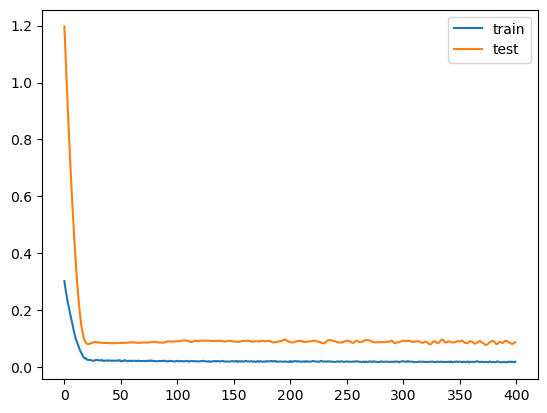

In [34]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()

In [35]:
x_test

array([[[ 1.03030303,  0.83333333,  0.66666667]],

       [[ 0.75757576,  0.83333333,  0.83333333]],

       [[ 1.01818182,  0.83333333,  1.        ]],

       [[ 1.09090909,  1.        , -0.83333333]],

       [[ 0.93333333,  1.        , -0.66666667]],

       [[ 1.1030303 ,  1.        , -0.5       ]],

       [[ 1.35757576,  1.        , -0.33333333]],

       [[ 1.42424242,  1.        , -0.16666667]],

       [[ 1.80606061,  1.        ,  0.        ]],

       [[ 2.33333333,  1.        ,  0.16666667]],

       [[ 2.23636364,  1.        ,  0.33333333]],

       [[ 1.64242424,  1.        ,  0.5       ]],

       [[ 1.35757576,  1.        ,  0.66666667]],

       [[ 0.92727273,  1.        ,  0.83333333]]])

In [36]:
y_pred = model.predict(x_test)
ot = rs_pas.inverse_transform(y_pred)
ot

1/1 [==============================] - 0s 423ms/step


array([[426.65918],
       [390.45068],
       [399.0041 ],
       [448.50922],
       [436.33884],
       [472.05643],
       [516.2012 ],
       [527.76227],
       [579.6821 ],
       [645.6153 ],
       [618.5825 ],
       [529.2401 ],
       [483.81757],
       [428.4124 ]], dtype=float32)

In [37]:
y_test_inv = rs_pas.inverse_transform(y_test.reshape(1,-1))
y_pred_inv = rs_pas.inverse_transform(y_pred)
y_pred_inv

array([[426.65918],
       [390.45068],
       [399.0041 ],
       [448.50922],
       [436.33884],
       [472.05643],
       [516.2012 ],
       [527.76227],
       [579.6821 ],
       [645.6153 ],
       [618.5825 ],
       [529.2401 ],
       [483.81757],
       [428.4124 ]], dtype=float32)

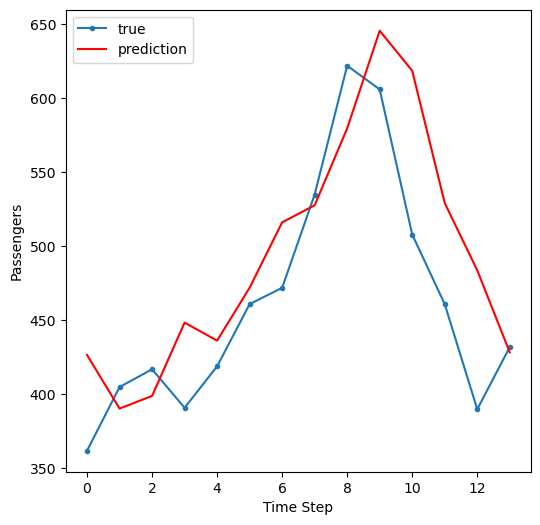

In [38]:
plt.figure(figsize=(6,6))
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Passengers')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [39]:
#save the model
model.save('airlines-model.h5')

In [40]:
# evaluate the model performance
import math
trainScore = model.evaluate(x_train,y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(x_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.02 MSE (0.15 RMSE)
Test Score: 0.10 MSE (0.32 RMSE)


In [41]:
y_test_inv = rs_pas.inverse_transform(y_test.reshape(1,-1))
y_pred_inv = rs_pas.inverse_transform(y_pred)

arr_1 = np.array(y_test_inv)
arr_2 = np.array(y_pred_inv)

actual = pd.DataFrame(data=arr_1.flatten(),columns=["actual"])
predicted = pd.DataFrame(data=arr_2.flatten(),columns = ["predicted"])

In [42]:
final = pd.concat([actual,predicted],axis=1)
final.head()

,actual,predicted
0,362.0,426.659180
1,405.0,390.450684
2,417.0,399.004089
3,391.0,448.509216
4,419.0,436.338837
